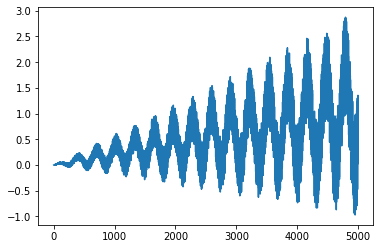

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def putAsMatrix(data, length):
 X, Y =[], []
 for i in range(len(data)-length):
  d=i+length  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

length = 4
N = 5000    
Tp = 800    

t=np.arange(0,N)
x=(np.sin(0.02*t)+2*np.random.rand(N))*(t/N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add length elements into train and test
test = np.append(test,np.repeat(test[-1,],length))
train = np.append(train,np.repeat(train[-1,],length))
 
trainX,trainY =putAsMatrix(train,length)
testX,testY =putAsMatrix(test,length)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



Epoch 1/50
800/800 [==============================] - 1s 2ms/sample - loss: 0.0172
Epoch 2/50
800/800 [==============================] - 0s 106us/sample - loss: 0.0172
Epoch 3/50
800/800 [==============================] - 0s 101us/sample - loss: 0.0172
Epoch 4/50
800/800 [==============================] - 0s 103us/sample - loss: 0.0172
Epoch 5/50
800/800 [==============================] - 0s 104us/sample - loss: 0.0172
Epoch 6/50
800/800 [==============================] - 0s 98us/sample - loss: 0.0172
Epoch 7/50
800/800 [==============================] - 0s 98us/sample - loss: 0.0172
Epoch 8/50
800/800 [==============================] - 0s 100us/sample - loss: 0.0172
Epoch 9/50
800/800 [==============================] - 0s 102us/sample - loss: 0.0172
Epoch 10/50
800/800 [==============================] - 0s 95us/sample - loss: 0.0172
Epoch 11/50
800/800 [==============================] - 0s 102us/sample - loss: 0.0172
Epoch 12/50
800/800 [==============================] - 0s 97us/sampl

ValueError: x and y can be no greater than 2-D, but have shapes (5000,) and (5000, 1, 100)

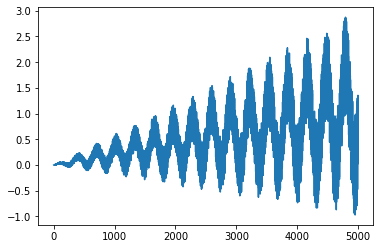

In [5]:
model = Sequential()
#Include here the specification of your network
#**********************************************
#model.add(...)
#...
#**********************************************
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(trainX,trainY, epochs=50, batch_size=16)
model.summary()

trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

#the vertical red line shows the point where testing data starts
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()